MEAN BASE: 0.5
LOGIT BASE: 0.7334971334971335


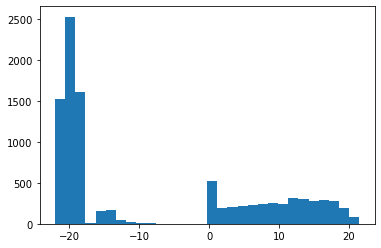

In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsRegressor


from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.impute import KNNImputer

from sklearn.preprocessing import StandardScaler

np.random.seed(109)

X_data = pd.read_csv('NHANESI_X.csv')
y_data = pd.read_csv('NHANESI_y.csv')

X_data = X_data.drop('Unnamed: 0', axis = 1)
y_data = y_data.drop('Unnamed: 0', axis = 1)

plt.hist(x=y_data.values, bins=30)
y_data['y'] = (abs(y_data['y'])>=18)*1

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2,  random_state = 109, shuffle=True, stratify=y_data['y']
)

X_data.head()
y_data.head()

combined = pd.concat([X_data, y_data], axis = 1)

combined_dropped = combined.dropna()

X_data_dropped = combined_dropped[['Age', 'Diastolic BP', 'Poverty index', 'Race', 'Red blood cells',
       'Sedimentation rate', 'Serum Albumin', 'Serum Cholesterol',
       'Serum Iron', 'Serum Magnesium', 'Serum Protein', 'Sex', 'Systolic BP',
       'TIBC', 'TS', 'White blood cells', 'BMI', 'Pulse pressure']]
y_data_dropped = combined_dropped[['y']]

imputer = KNNImputer(n_neighbors=1)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.fit_transform(X_test)

X_train_impute = pd.DataFrame(X_train_imputed, columns = X_data.columns)
X_test_impute = pd.DataFrame(X_test_imputed, columns = X_data.columns)

y_train = pd.DataFrame(y_train.values, columns = y_data.columns)
y_test = pd.DataFrame(y_test.values, columns = y_data.columns)

train_imputed = pd.concat([X_train_impute, y_train], axis = 1)
test_imputed = pd.concat([X_test_impute, y_test], axis = 1)

train_imputed.head()

X_train_impute.columns

train_sex = X_train_impute['Sex'].subtract(1)
X_train_impute['Sex'] = train_sex

test_sex = X_test_impute['Sex'].subtract(1)
X_test_impute['Sex'] = test_sex

train_race = X_train_impute['Race'].subtract(1)
X_train_impute['Race'] = train_race

test_race = X_test_impute['Race'].subtract(1)
X_test_impute['Race'] = test_race

X_train_impute.head()
scaler = StandardScaler()

# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(interaction_only=True)
# X_train_poly_reg = scaler.fit_transform(poly.fit_transform(X_train_impute))
# X_test_poly_reg = scaler.fit_transform(poly.fit_transform(X_test_impute))

# Baseline KNN regression model on dropped data
baseline_kNN_model = KNeighborsClassifier(n_neighbors=len(X_train_impute)).fit(X_train_impute,y_train.values.ravel())
y_pred = baseline_kNN_model.predict(X_test_impute)

X_train_impute = scaler.fit_transform(X_train_impute)
X_test_impute = scaler.fit_transform(X_test_impute)

baseline_kNN_model_accuracy = roc_auc_score(y_test, y_pred)
print(f"MEAN BASE: {baseline_kNN_model_accuracy}")

# Logistic regression model on dropped data
logit_base = LogisticRegression(max_iter=100000).fit(X_train_impute,y_train.values.ravel())
y_pred = logit_base.predict(X_test_impute)

logit_base_test_accuracy = roc_auc_score(y_test, y_pred)
print(f"LOGIT BASE: {logit_base_test_accuracy}")

In [2]:
X_data.head()


,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure
0,35.0,92.0,126.0,2.0,77.7,12.0,5.0,165.0,135.0,1.37,7.6,2.0,142.0,323.0,41.8,5.8,31.109434,50.0
1,71.0,78.0,210.0,2.0,77.7,37.0,4.0,298.0,89.0,1.38,6.4,2.0,156.0,331.0,26.9,5.3,32.362572,78.0
2,74.0,86.0,999.0,2.0,77.7,31.0,3.8,222.0,115.0,1.37,7.4,2.0,170.0,299.0,38.5,8.1,25.388497,84.0
3,64.0,92.0,385.0,1.0,77.7,30.0,4.3,265.0,94.0,1.97,7.3,2.0,172.0,349.0,26.9,6.7,26.446610,80.0
4,32.0,70.0,183.0,2.0,77.7,18.0,5.0,203.0,192.0,1.35,7.3,1.0,128.0,386.0,49.7,8.1,20.354684,58.0


In [3]:
y_data.head()

,y
0,0
1,0
2,0
3,1
4,0


In [4]:
print("X_data # of null values for each predictor:")
print(X_data[X_data.isnull().any(axis=1)].count())
print("\ny_data # of null values for the prediction:")
print(y_data[y_data.isnull().any(axis=1)].count())

print(X_data.columns)
print(y_data.columns)



X_data # of null values for each predictor:
Age                   1339
Diastolic BP          1281
Poverty index         1339
Race                  1339
Red blood cells       1339
Sedimentation rate     513
Serum Albumin         1339
Serum Cholesterol     1339
Serum Iron            1339
Serum Magnesium       1339
Serum Protein         1339
Sex                   1339
Systolic BP           1282
TIBC                  1339
TS                    1339
White blood cells      298
BMI                   1339
Pulse pressure        1280
dtype: int64

y_data # of null values for the prediction:
y    0
dtype: int64
Index(['Age', 'Diastolic BP', 'Poverty index', 'Race', 'Red blood cells',
       'Sedimentation rate', 'Serum Albumin', 'Serum Cholesterol',
       'Serum Iron', 'Serum Magnesium', 'Serum Protein', 'Sex', 'Systolic BP',
       'TIBC', 'TS', 'White blood cells', 'BMI', 'Pulse pressure'],
      dtype='object')
Index(['y'], dtype='object')


In [5]:
#X_data_dropped = X_data.dropna()
#y_data_dropped = y_data.dropna()
combined = pd.concat([X_data, y_data], axis = 1)
print(combined.shape)

combined_dropped = combined.dropna()

print(combined_dropped.shape)

X_data_dropped = combined_dropped[['Age', 'Diastolic BP', 'Poverty index', 'Race', 'Red blood cells',
       'Sedimentation rate', 'Serum Albumin', 'Serum Cholesterol',
       'Serum Iron', 'Serum Magnesium', 'Serum Protein', 'Sex', 'Systolic BP',
       'TIBC', 'TS', 'White blood cells', 'BMI', 'Pulse pressure']]
y_data_dropped = combined_dropped[['y']]

print(X_data_dropped.shape)
print(y_data_dropped.shape)


#knn imputer.fit
#choose number of transmitter


(9932, 19)
(8593, 19)
(8593, 18)
(8593, 1)


In [6]:
# impute X_data with KNN imputer, n_neighbors = 1

imputer = KNNImputer(n_neighbors=1)
imputer_result = imputer.fit_transform(X_data)

# print(imputer_result)
# print(type(imputer_result))

# turn it into a dataframe, rename columns
X_data_imputed = pd.DataFrame(imputer_result, columns = X_data.columns)

imputed = pd.concat([X_data_imputed, y_data], axis = 1)

X_data_imputed.head()

,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure
0,35.0,92.0,126.0,2.0,77.7,12.0,5.0,165.0,135.0,1.37,7.6,2.0,142.0,323.0,41.8,5.8,31.109434,50.0
1,71.0,78.0,210.0,2.0,77.7,37.0,4.0,298.0,89.0,1.38,6.4,2.0,156.0,331.0,26.9,5.3,32.362572,78.0
2,74.0,86.0,999.0,2.0,77.7,31.0,3.8,222.0,115.0,1.37,7.4,2.0,170.0,299.0,38.5,8.1,25.388497,84.0
3,64.0,92.0,385.0,1.0,77.7,30.0,4.3,265.0,94.0,1.97,7.3,2.0,172.0,349.0,26.9,6.7,26.446610,80.0
4,32.0,70.0,183.0,2.0,77.7,18.0,5.0,203.0,192.0,1.35,7.3,1.0,128.0,386.0,49.7,8.1,20.354684,58.0


In [7]:
X_data_imputed.columns

Index(['Age', 'Diastolic BP', 'Poverty index', 'Race', 'Red blood cells',
       'Sedimentation rate', 'Serum Albumin', 'Serum Cholesterol',
       'Serum Iron', 'Serum Magnesium', 'Serum Protein', 'Sex', 'Systolic BP',
       'TIBC', 'TS', 'White blood cells', 'BMI', 'Pulse pressure'],
      dtype='object')

In [8]:
# looking at which variables are categorical

# pd.unique(X_data_imputed["Red blood cells"])
# pd.unique(X_data_imputed["Age"])
# pd.unique(X_data_imputed["Race"])

# race and sex only?

Dropped DF Correlation Matrix:


,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure,y
Age,1.000000,0.263400,-0.025665,-0.008959,0.014718,0.208027,-0.199345,0.351018,-0.021265,0.087770,-0.033123,-0.155667,0.510604,-0.245259,0.076600,-0.068769,0.109757,0.505331,-0.438657
Diastolic BP,0.263400,1.000000,-0.042233,0.137374,0.067371,0.053945,0.013007,0.169601,-0.047725,0.019155,0.142616,-0.139052,0.701384,0.017172,-0.049950,-0.003574,0.367024,0.228974,-0.168786
Poverty index,-0.025665,-0.042233,1.000000,-0.151401,0.027313,-0.133749,0.079018,0.028238,0.091832,0.038623,-0.083184,-0.068519,-0.078905,-0.020123,0.090705,0.009956,-0.086935,-0.076975,0.101498
Race,-0.008959,0.137374,-0.151401,1.000000,-0.040210,0.179213,-0.096135,-0.018029,-0.077274,-0.142108,0.212328,0.012339,0.118865,-0.018166,-0.065060,-0.107418,0.091959,0.062200,-0.102544
Red blood cells,0.014718,0.067371,0.027313,-0.040210,1.000000,-0.093165,0.035966,0.012462,0.058178,0.083691,0.038367,-0.156992,0.048091,-0.023849,0.062435,0.019086,0.060813,0.016571,-0.006620
Sedimentation rate,0.208027,0.053945,-0.133749,0.179213,-0.093165,1.000000,-0.263014,0.124130,-0.173101,-0.104706,0.165542,0.270968,0.163140,0.014881,-0.161675,0.015778,0.135682,0.183477,-0.156479
Serum Albumin,-0.199345,0.013007,0.079018,-0.096135,0.035966,-0.263014,1.000000,0.061070,0.110436,0.159124,0.458180,-0.113590,-0.058108,0.122741,0.044447,0.015113,-0.056252,-0.088838,0.149371
Serum Cholesterol,0.351018,0.169601,0.028238,-0.018029,0.012462,0.124130,0.061070,1.000000,0.044567,0.073676,0.064698,0.000666,0.228813,0.028750,0.021419,0.011164,0.150966,0.188864,-0.127398
Serum Iron,-0.021265,-0.047725,0.091832,-0.077274,0.058178,-0.173101,0.110436,0.044567,1.000000,-0.010136,0.010141,-0.098922,-0.060438,0.019129,0.906151,-0.081658,-0.121322,-0.047753,0.025153
Serum Magnesium,0.087770,0.019155,0.038623,-0.142108,0.083691,-0.104706,0.159124,0.073676,-0.010136,1.000000,0.036181,-0.081366,0.009813,-0.048819,0.006353,-0.003525,-0.027422,-0.000561,0.029727


X_dropped Correlation Matrix:


,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure
Age,1.000000,0.263400,-0.025665,-0.008959,0.014718,0.208027,-0.199345,0.351018,-0.021265,0.087770,-0.033123,-0.155667,0.510604,-0.245259,0.076600,-0.068769,0.109757,0.505331
Diastolic BP,0.263400,1.000000,-0.042233,0.137374,0.067371,0.053945,0.013007,0.169601,-0.047725,0.019155,0.142616,-0.139052,0.701384,0.017172,-0.049950,-0.003574,0.367024,0.228974
Poverty index,-0.025665,-0.042233,1.000000,-0.151401,0.027313,-0.133749,0.079018,0.028238,0.091832,0.038623,-0.083184,-0.068519,-0.078905,-0.020123,0.090705,0.009956,-0.086935,-0.076975
Race,-0.008959,0.137374,-0.151401,1.000000,-0.040210,0.179213,-0.096135,-0.018029,-0.077274,-0.142108,0.212328,0.012339,0.118865,-0.018166,-0.065060,-0.107418,0.091959,0.062200
Red blood cells,0.014718,0.067371,0.027313,-0.040210,1.000000,-0.093165,0.035966,0.012462,0.058178,0.083691,0.038367,-0.156992,0.048091,-0.023849,0.062435,0.019086,0.060813,0.016571
Sedimentation rate,0.208027,0.053945,-0.133749,0.179213,-0.093165,1.000000,-0.263014,0.124130,-0.173101,-0.104706,0.165542,0.270968,0.163140,0.014881,-0.161675,0.015778,0.135682,0.183477
Serum Albumin,-0.199345,0.013007,0.079018,-0.096135,0.035966,-0.263014,1.000000,0.061070,0.110436,0.159124,0.458180,-0.113590,-0.058108,0.122741,0.044447,0.015113,-0.056252,-0.088838
Serum Cholesterol,0.351018,0.169601,0.028238,-0.018029,0.012462,0.124130,0.061070,1.000000,0.044567,0.073676,0.064698,0.000666,0.228813,0.028750,0.021419,0.011164,0.150966,0.188864
Serum Iron,-0.021265,-0.047725,0.091832,-0.077274,0.058178,-0.173101,0.110436,0.044567,1.000000,-0.010136,0.010141,-0.098922,-0.060438,0.019129,0.906151,-0.081658,-0.121322,-0.047753
Serum Magnesium,0.087770,0.019155,0.038623,-0.142108,0.083691,-0.104706,0.159124,0.073676,-0.010136,1.000000,0.036181,-0.081366,0.009813,-0.048819,0.006353,-0.003525,-0.027422,-0.000561


Imputed DF Correlation Matrix:


,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure,y
Age,1.000000,0.260150,-0.030336,-0.003557,0.030538,0.207435,-0.202611,0.346071,-0.016897,0.083664,-0.036282,-0.159728,0.507829,-0.248023,0.081067,-0.066111,0.096906,0.502980,-0.443562
Diastolic BP,0.260150,1.000000,-0.060464,0.139949,0.053036,0.063750,0.012697,0.168044,-0.043967,0.019320,0.145307,-0.138018,0.699397,0.019954,-0.048895,-0.000176,0.346933,0.226472,-0.169466
Poverty index,-0.030336,-0.060464,1.000000,-0.162852,0.023129,-0.141563,0.078224,0.021656,0.088710,0.041488,-0.090320,-0.066834,-0.091296,-0.017126,0.086054,0.012390,-0.087678,-0.080639,0.100513
Race,-0.003557,0.139949,-0.162852,1.000000,-0.021594,0.173860,-0.096122,-0.016785,-0.076524,-0.148282,0.223579,0.011563,0.118723,-0.020819,-0.063119,-0.101391,0.096245,0.060373,-0.107600
Red blood cells,0.030538,0.053036,0.023129,-0.021594,1.000000,-0.034265,0.011940,-0.004661,0.040528,0.061317,-0.002208,-0.122050,0.042595,-0.033672,0.050149,0.017317,0.037731,0.019451,-0.014111
Sedimentation rate,0.207435,0.063750,-0.141563,0.173860,-0.034265,1.000000,-0.249370,0.123590,-0.175114,-0.094852,0.152329,0.255341,0.169919,0.011087,-0.161848,0.009723,0.128763,0.185574,-0.156635
Serum Albumin,-0.202611,0.012697,0.078224,-0.096122,0.011940,-0.249370,1.000000,0.059050,0.111313,0.161717,0.453112,-0.111634,-0.063672,0.120015,0.045508,0.015919,-0.054240,-0.096022,0.154161
Serum Cholesterol,0.346071,0.168044,0.021656,-0.016785,-0.004661,0.123590,0.059050,1.000000,0.042910,0.062945,0.065038,0.002212,0.229361,0.030175,0.018212,0.013519,0.146104,0.190355,-0.126272
Serum Iron,-0.016897,-0.043967,0.088710,-0.076524,0.040528,-0.175114,0.111313,0.042910,1.000000,-0.005187,0.003120,-0.107358,-0.057481,0.014689,0.905566,-0.078046,-0.126294,-0.046591,0.019172
Serum Magnesium,0.083664,0.019320,0.041488,-0.148282,0.061317,-0.094852,0.161717,0.062945,-0.005187,1.000000,0.033368,-0.081849,0.005156,-0.044119,0.008521,0.003031,-0.031072,-0.006460,0.031983


X_imputed Correlation Matrix:


,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure
Age,1.000000,0.260150,-0.030336,-0.003557,0.030538,0.207435,-0.202611,0.346071,-0.016897,0.083664,-0.036282,-0.159728,0.507829,-0.248023,0.081067,-0.066111,0.096906,0.502980
Diastolic BP,0.260150,1.000000,-0.060464,0.139949,0.053036,0.063750,0.012697,0.168044,-0.043967,0.019320,0.145307,-0.138018,0.699397,0.019954,-0.048895,-0.000176,0.346933,0.226472
Poverty index,-0.030336,-0.060464,1.000000,-0.162852,0.023129,-0.141563,0.078224,0.021656,0.088710,0.041488,-0.090320,-0.066834,-0.091296,-0.017126,0.086054,0.012390,-0.087678,-0.080639
Race,-0.003557,0.139949,-0.162852,1.000000,-0.021594,0.173860,-0.096122,-0.016785,-0.076524,-0.148282,0.223579,0.011563,0.118723,-0.020819,-0.063119,-0.101391,0.096245,0.060373
Red blood cells,0.030538,0.053036,0.023129,-0.021594,1.000000,-0.034265,0.011940,-0.004661,0.040528,0.061317,-0.002208,-0.122050,0.042595,-0.033672,0.050149,0.017317,0.037731,0.019451
Sedimentation rate,0.207435,0.063750,-0.141563,0.173860,-0.034265,1.000000,-0.249370,0.123590,-0.175114,-0.094852,0.152329,0.255341,0.169919,0.011087,-0.161848,0.009723,0.128763,0.185574
Serum Albumin,-0.202611,0.012697,0.078224,-0.096122,0.011940,-0.249370,1.000000,0.059050,0.111313,0.161717,0.453112,-0.111634,-0.063672,0.120015,0.045508,0.015919,-0.054240,-0.096022
Serum Cholesterol,0.346071,0.168044,0.021656,-0.016785,-0.004661,0.123590,0.059050,1.000000,0.042910,0.062945,0.065038,0.002212,0.229361,0.030175,0.018212,0.013519,0.146104,0.190355
Serum Iron,-0.016897,-0.043967,0.088710,-0.076524,0.040528,-0.175114,0.111313,0.042910,1.000000,-0.005187,0.003120,-0.107358,-0.057481,0.014689,0.905566,-0.078046,-0.126294,-0.046591
Serum Magnesium,0.083664,0.019320,0.041488,-0.148282,0.061317,-0.094852,0.161717,0.062945,-0.005187,1.000000,0.033368,-0.081849,0.005156,-0.044119,0.008521,0.003031,-0.031072,-0.006460


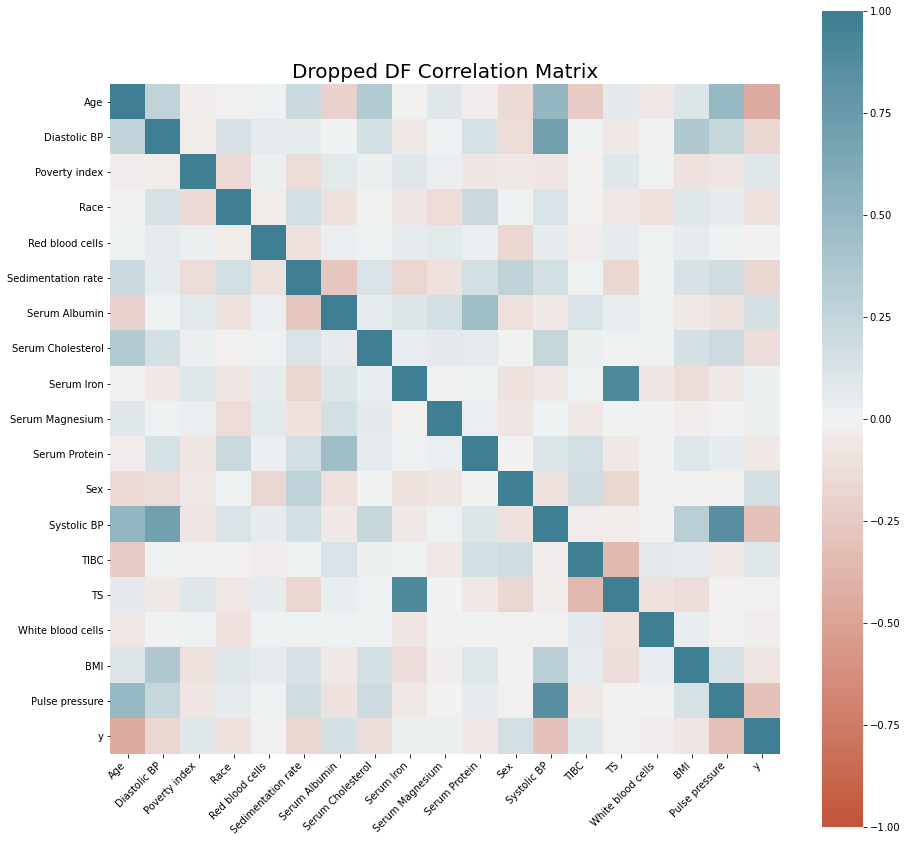

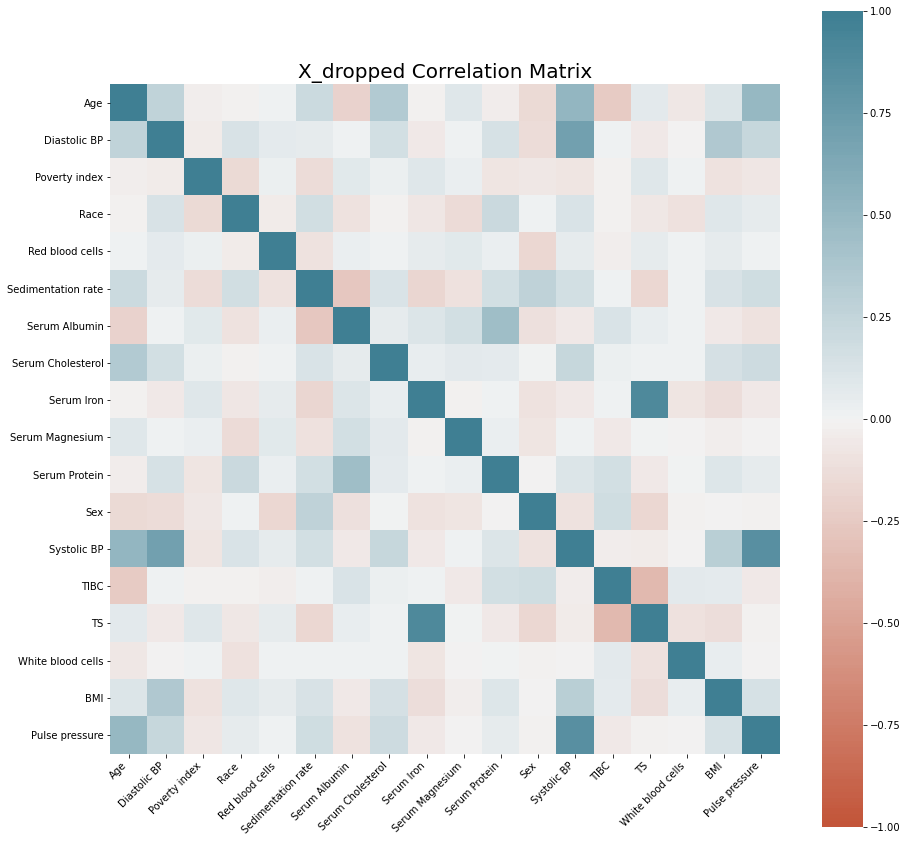

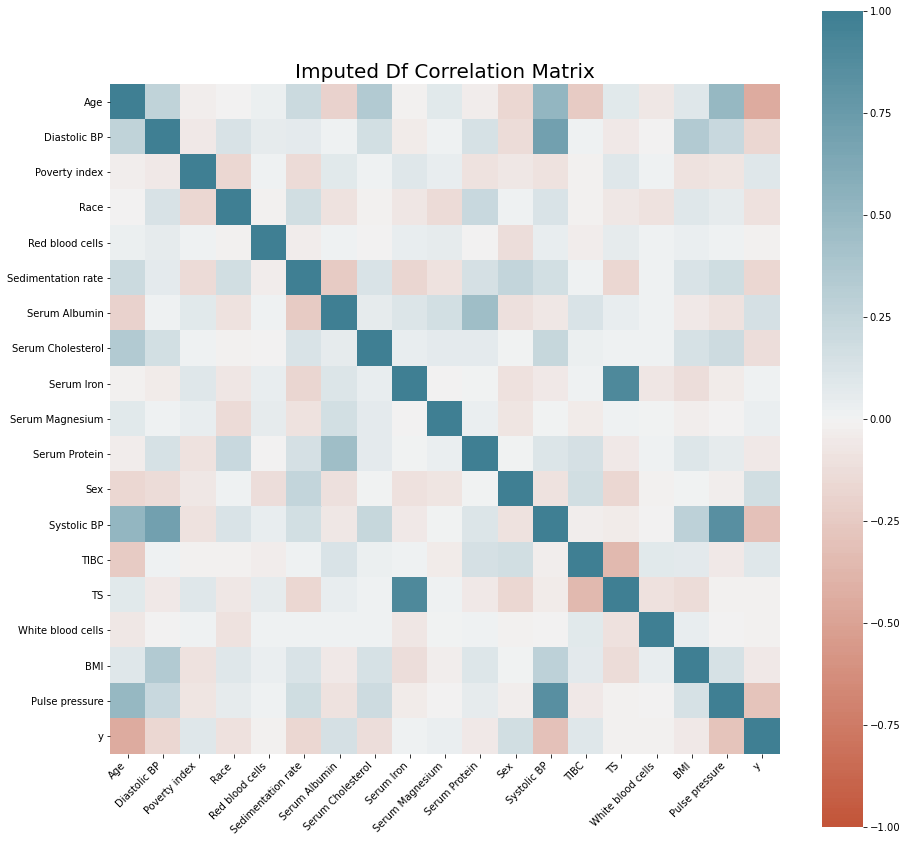

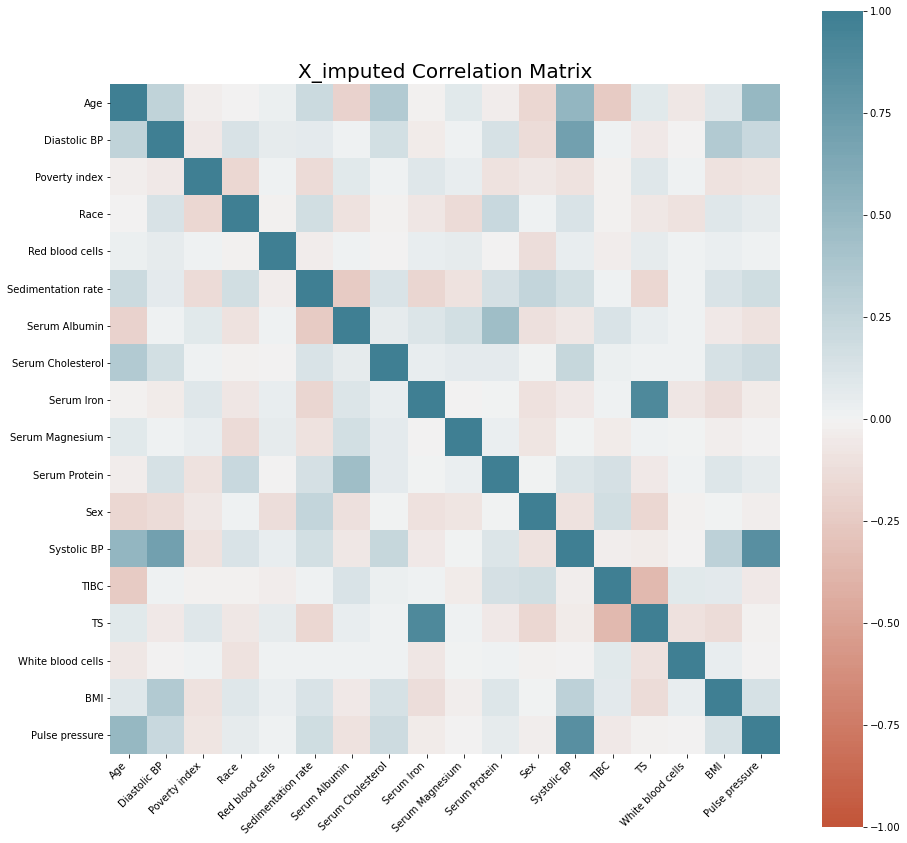

In [9]:
# Dealing with Data with Dropped NaN Values First:

print("Dropped DF Correlation Matrix:")
dropped_corr = combined_dropped.corr()
display(dropped_corr)

print("X_dropped Correlation Matrix:")
X_dropped_corr = X_data_dropped.corr()
display(X_dropped_corr)

# Then the Imputed Data Next:
print("Imputed DF Correlation Matrix:")
imputed_corr = imputed.corr()
display(imputed_corr)

print("X_imputed Correlation Matrix:")
X_imputed_corr = X_data_imputed.corr()
display(X_imputed_corr)

# Visually digestible:
ax1 = plt.figure(figsize=(15,15))
ax1 = sns.heatmap(
    dropped_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax1.set_title("Dropped DF Correlation Matrix", fontsize=20)

plt.show()

ax2 = plt.figure(figsize=(15,15))
ax2 = sns.heatmap(
    X_dropped_corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax2.set_xticklabels(
    ax2.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax2.set_title("X_dropped Correlation Matrix", fontsize=20)

plt.show()

ax3 = plt.figure(figsize=(15,15))
ax3 = sns.heatmap(
    imputed_corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax3.set_xticklabels(
    ax3.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax3.set_title("Imputed Df Correlation Matrix", fontsize=20)

plt.show()

ax4 = plt.figure(figsize=(15,15))
ax4 = sns.heatmap(
    X_imputed_corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax4.set_xticklabels(
    ax4.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax4.set_title("X_imputed Correlation Matrix", fontsize=20)

plt.show()

**At first glance, it seems that log-odds mortality rate is moderately strongly correalted with age, systolic BP, as well as pulse pressure.**


### Histogram and Box-Plot of Mortality Rate Log-Odds:

In [10]:
# # Dropped Log-Odds Histogram
# fig1 = plt.figure()
# sns.histplot(y_data_dropped.to_numpy(), legend=False)
# plt.title("Dropped Log-Odds Histogram")
# plt.xlabel("Log-Odds")
# plt.ylabel("Count")
# plt.show()

# # Imputed Log-Odds Histogram
# fig2 = plt.figure()
# sns.histplot(y_data.to_numpy(), legend=False)
# plt.title("Imputed Log-Odds Histogram")
# plt.xlabel("Log-Odds")
# plt.ylabel("Count")
# plt.show()

# fig3 = plt.figure()
# sns.set_theme(style="whitegrid")
# sns.boxplot(data=y_data_dropped.to_numpy(), orient="h")
# plt.title("Dropped Log-Odds Boxplot")
# plt.xlabel("Log-Odds")
# plt.show()

# fig4 = plt.figure()
# sns.set_theme(style="whitegrid")
# sns.boxplot(data=y_data.to_numpy(), orient="h")
# plt.title("Imputed Log-Odds Boxplot")
# plt.xlabel("Log-Odds")
# plt.show()

In [11]:
# # scatterplots not imputed
# fig, axs = plt.subplots(6, 3, figsize=(20,15))
# combined_dropped = pd.concat([X_data_dropped, y_data_dropped], axis = 1)
# fig.tight_layout()

# for i, col in enumerate(X_data_dropped.columns):
#     col = X_data_dropped.columns[i]
#     axs[i//3, i % 3].scatter(X_data_dropped[col], y_data_dropped)
#     axs[i//3, i % 3].set_label(col)
#     axs[i//3, i % 3].set_label("log odds")
#     axs[i//3, i % 3].set_title("scatterplot of log odds vs " + col)
#     # sns.regplot(x=X_data_imputed[col], y=y_data, ax = axs[i])

# plt.show()
# plt.clf()
# plt.close()

In [12]:
# # scatterplots IMPUTED

# fig, axs = plt.subplots(6, 3, figsize=(20,15))
# combined_imputed = pd.concat([X_data_imputed, y_data], axis = 1)
# fig.tight_layout()

# for i, col in enumerate(X_data_imputed.columns):
#     col = X_data_imputed.columns[i]
#     axs[i//3, i % 3].scatter(X_data_imputed[col], y_data)
#     axs[i//3, i % 3].set_label(col)
#     axs[i//3, i % 3].set_label("log odds")
#     axs[i//3, i % 3].set_title("scatterplot of log odds vs " + col)
#     # sns.regplot(x=X_data_imputed[col], y=y_data, ax = axs[i])

# plt.show()
# plt.clf()
# plt.close()

In [13]:
# # boxplot for dropped data

# fig, axes = plt.subplots(6, 3, figsize = (20, 15))
# for i, col in enumerate(X_data_dropped.columns):
#     a = X_data_dropped.boxplot(col, ax = axes.flatten()[i])
#     axes[i//3, i % 3].set_label(col)
#     axes[i//3, i % 3].set_title("boxplot of " + col)
# plt.tight_layout()

# plt.show()
# plt.clf()
# plt.close()

In [14]:
# # boxplot for imputed data

# fig, axes = plt.subplots(6, 3, figsize = (20, 15))
# for i, col in enumerate(X_data_imputed.columns):
#     a = X_data_imputed.boxplot(col, ax = axes.flatten()[i])
#     axes[i//3, i % 3].set_label(col)
#     axes[i//3, i % 3].set_title("boxplot of " + col)
# plt.tight_layout()

# plt.show()
# plt.clf()
# plt.close()

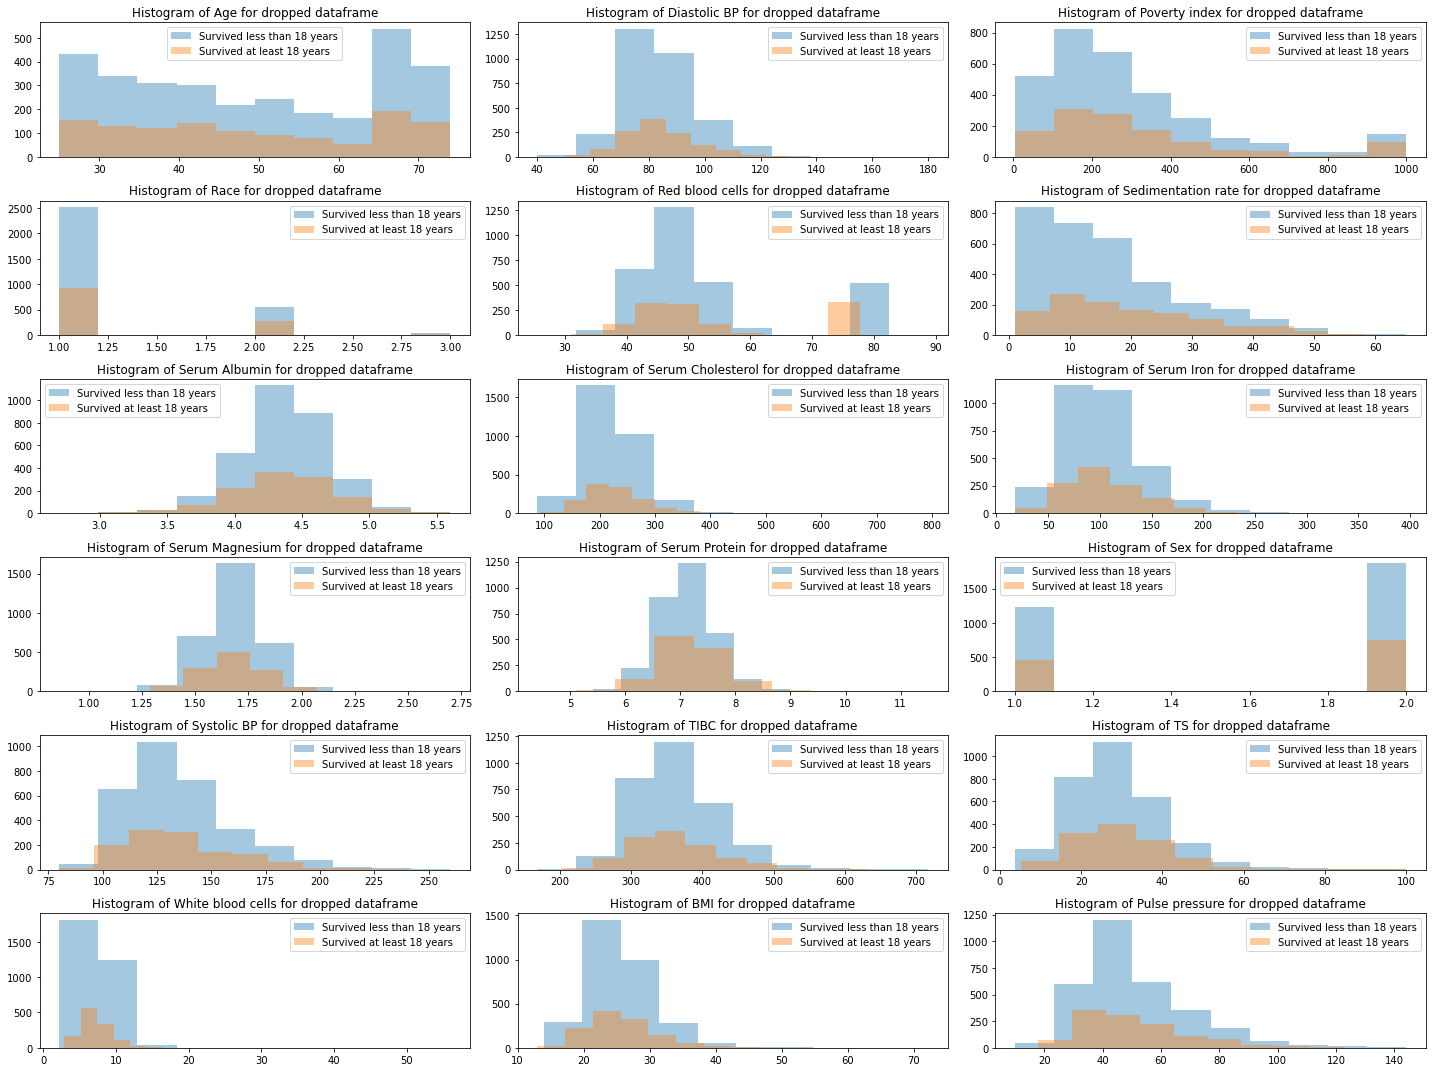

In [15]:
#Histograms for dropped predictors 
indices_zero = np.where(y_train['y'].values == 0)[0]
indices_one = np.where(y_test['y'].values == 1)[0]

fig, axes = plt.subplots(6, 3, figsize = (20, 15))
for i, col in enumerate(X_data_dropped.columns):
    axes[i//3, i % 3].hist(X_data_dropped.iloc[indices_zero][col], label="Survived less than 18 years", alpha=0.4)
    axes[i//3, i % 3].hist(X_data_dropped.iloc[indices_one][col], label="Survived at least 18 years", alpha=0.4)
    axes[i//3, i % 3].set_label(col)
    axes[i//3, i % 3].set_title("Histogram of " + col+" for dropped dataframe")
    axes[i//3, i % 3].legend()
plt.tight_layout()

plt.show()
plt.clf()
plt.close()

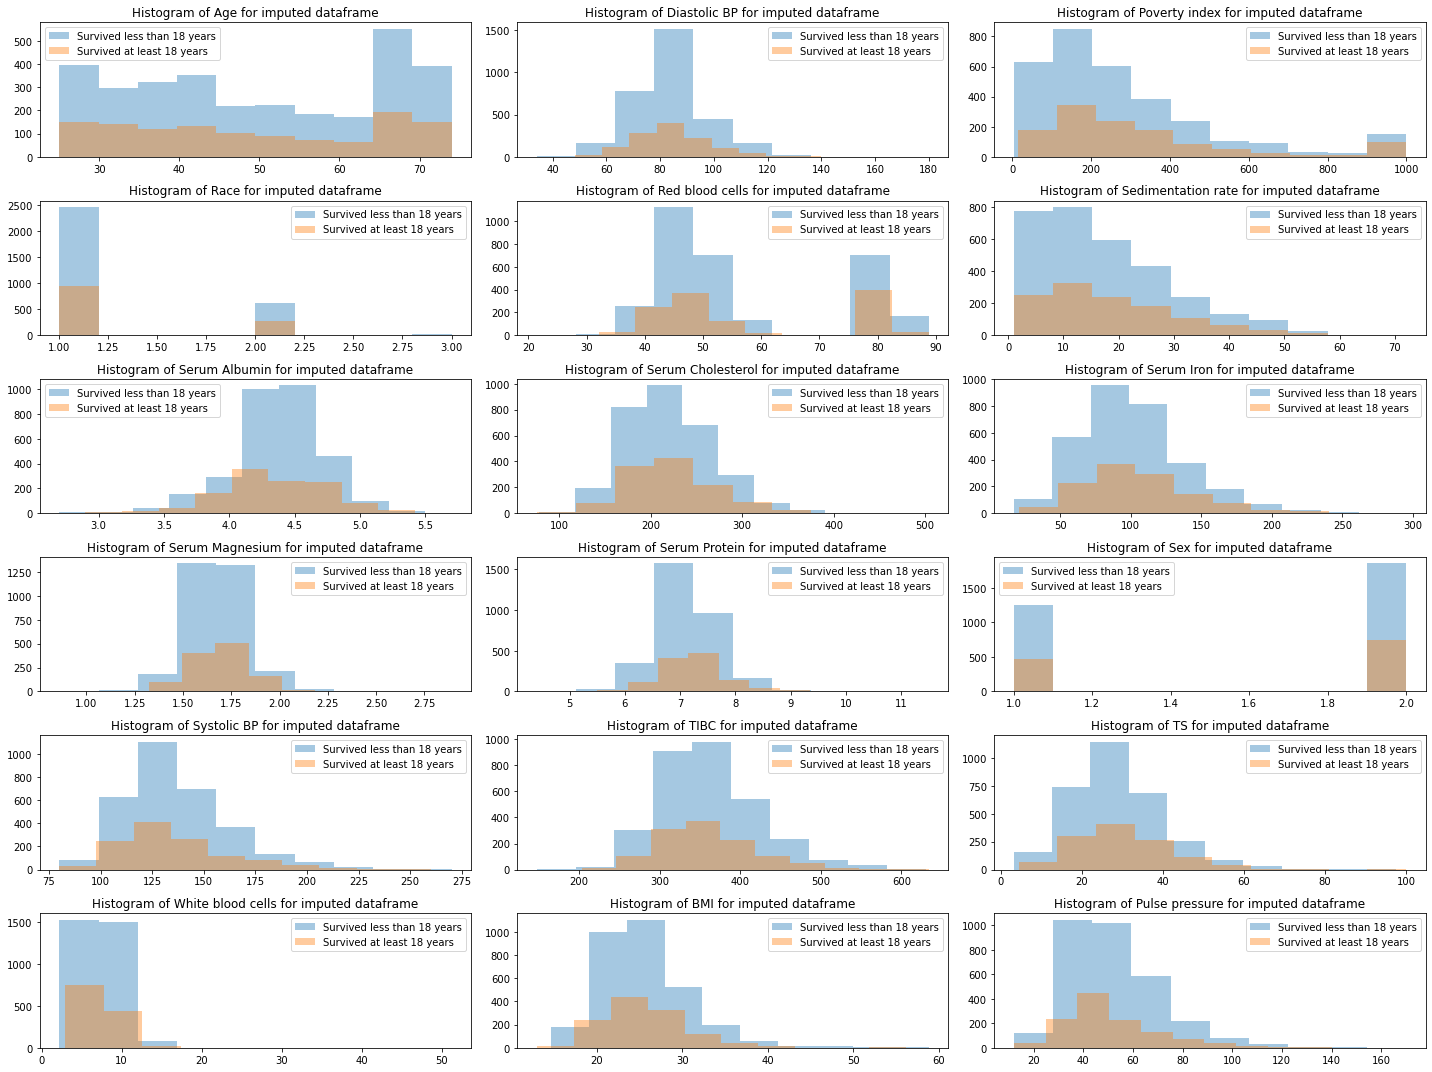

In [16]:
#Histogram for imputed predictors

fig, axes = plt.subplots(6, 3, figsize = (20, 15))
for i, col in enumerate(X_data_imputed.columns):
    axes[i//3, i % 3].hist(X_data_imputed.iloc[indices_zero][col], label="Survived less than 18 years", alpha=0.4)
    axes[i//3, i % 3].hist(X_data_imputed.iloc[indices_one][col], label="Survived at least 18 years", alpha=0.4)
    axes[i//3, i % 3].set_label(col)
    axes[i//3, i % 3].set_title("Histogram of " + col+" for imputed dataframe")
    axes[i//3, i % 3].legend()

plt.tight_layout()

plt.show()
plt.clf()
plt.close()

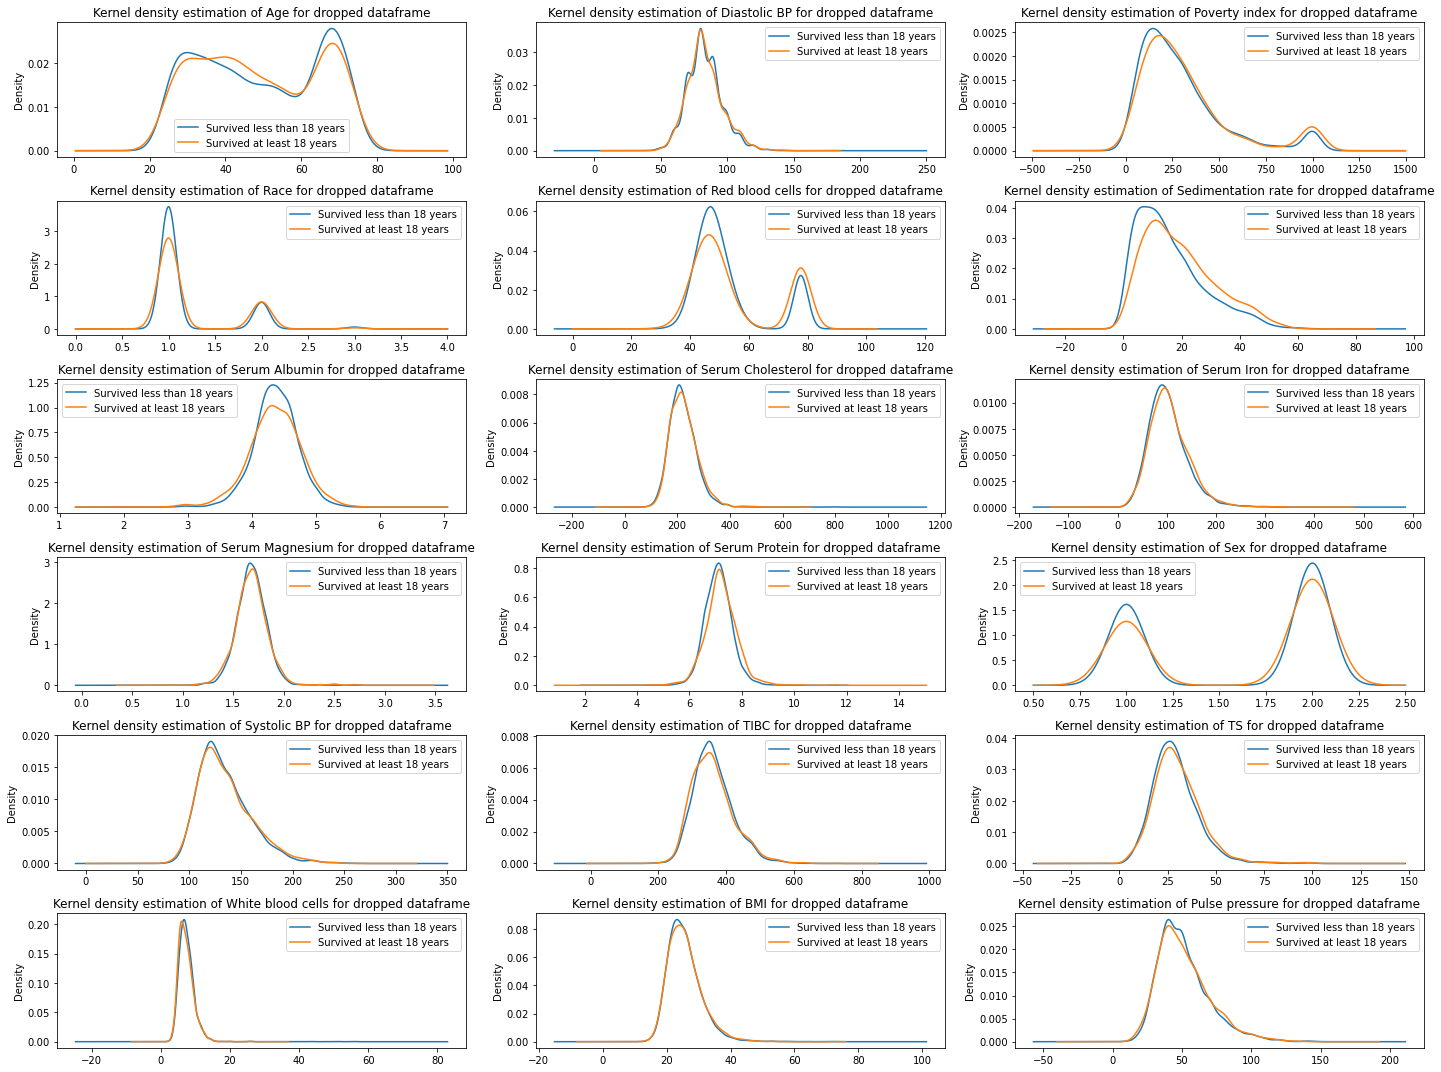

In [17]:
#Kernel density estimation for dropped predictors

fig, axes = plt.subplots(6, 3, figsize = (20, 15))
for i, col in enumerate(X_data_dropped.columns):
    a = X_data_dropped.iloc[indices_zero][[col]].plot.density(ax = axes.flatten()[i])
    b = X_data_dropped.iloc[indices_one][[col]].plot.density(ax = axes.flatten()[i])

    #axes[i//3, i % 3].hist(X_data_imputed.iloc[indices_zero][col], label="Survived less than 18 years", alpha=0.4)
    #axes[i//3, i % 3].hist(X_data_imputed.iloc[indices_one][col], label="Survived at least 18 years", alpha=0.4)
    axes[i//3, i % 3].set_label(col)
    axes[i//3, i % 3].set_title("Kernel density estimation of " + col +" for dropped dataframe")
    axes[i//3, i % 3].legend(["Survived less than 18 years","Survived at least 18 years"]);
plt.tight_layout()


plt.show()
plt.clf()
plt.close()

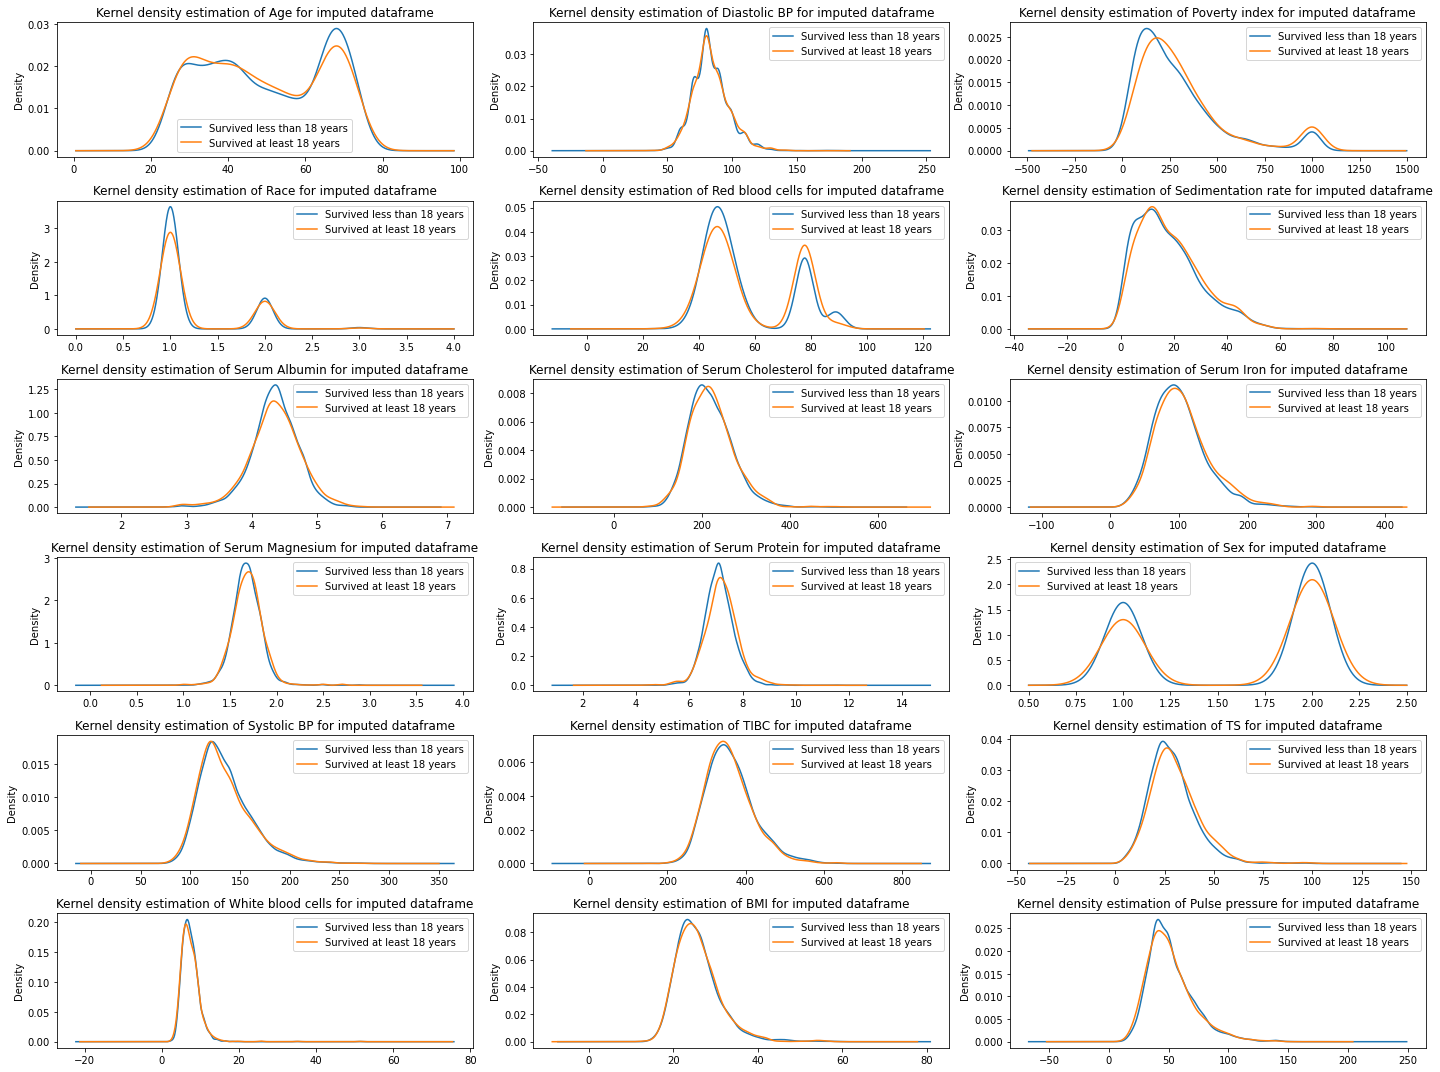

In [18]:
# Kernel density estimation for imputed predictors

fig, axes = plt.subplots(6, 3, figsize = (20, 15))
for i, col in enumerate(X_data_imputed.columns):
    a = X_data_imputed.iloc[indices_zero][[col]].plot.density(ax = axes.flatten()[i])
    b = X_data_imputed.iloc[indices_one][[col]].plot.density(ax = axes.flatten()[i])

    #axes[i//3, i % 3].hist(X_data_imputed.iloc[indices_zero][col], label="Survived less than 18 years", alpha=0.4)
    #axes[i//3, i % 3].hist(X_data_imputed.iloc[indices_one][col], label="Survived at least 18 years", alpha=0.4)
    axes[i//3, i % 3].set_label(col)
    axes[i//3, i % 3].set_title("Kernel density estimation of " + col +" for imputed dataframe")
    axes[i//3, i % 3].legend(["Survived less than 18 years","Survived at least 18 years"]);
plt.tight_layout()

plt.show()
plt.clf()
plt.close()

In [20]:
imputer = KNNImputer(n_neighbors=1)
imputer_result = imputer.fit_transform(X_data)
print(type(imputer_result))
combined = pd.concat([X_data, y_data], axis = 1)
print(combined.shape)
combined_dropped = combined.dropna()

# turn it into a dataframe, rename columns
X_data_imputed = pd.DataFrame(imputer_result, columns = X_data.columns)
X_data_imputed.head()

<class 'numpy.ndarray'>
(9932, 19)


,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure
0,35.0,92.0,126.0,2.0,77.7,12.0,5.0,165.0,135.0,1.37,7.6,2.0,142.0,323.0,41.8,5.8,31.109434,50.0
1,71.0,78.0,210.0,2.0,77.7,37.0,4.0,298.0,89.0,1.38,6.4,2.0,156.0,331.0,26.9,5.3,32.362572,78.0
2,74.0,86.0,999.0,2.0,77.7,31.0,3.8,222.0,115.0,1.37,7.4,2.0,170.0,299.0,38.5,8.1,25.388497,84.0
3,64.0,92.0,385.0,1.0,77.7,30.0,4.3,265.0,94.0,1.97,7.3,2.0,172.0,349.0,26.9,6.7,26.446610,80.0
4,32.0,70.0,183.0,2.0,77.7,18.0,5.0,203.0,192.0,1.35,7.3,1.0,128.0,386.0,49.7,8.1,20.354684,58.0


In [21]:
#linear regresion, knn imputation, mean imputation, then transform the dataset 

# split beforehand

# baseline with drop model
# 2nd model, with imputation ()
X_data_dropped = combined_dropped[['Age', 'Diastolic BP', 'Poverty index', 'Race', 'Red blood cells',
       'Sedimentation rate', 'Serum Albumin', 'Serum Cholesterol',
       'Serum Iron', 'Serum Magnesium', 'Serum Protein', 'Sex', 'Systolic BP',
       'TIBC', 'TS', 'White blood cells', 'BMI', 'Pulse pressure']]
y_data_dropped = combined_dropped[['y']]

print(X_data_dropped.shape)
print(y_data_dropped.shape)


# 

(8593, 18)
(8593, 1)


In [22]:
#Check data types of columns and recast if needed
print(X_data.dtypes)
print(y_data.dtypes)
print("All columns are floats, which means we are good to go!")

Age                   float64
Diastolic BP          float64
Poverty index         float64
Race                  float64
Red blood cells       float64
Sedimentation rate    float64
Serum Albumin         float64
Serum Cholesterol     float64
Serum Iron            float64
Serum Magnesium       float64
Serum Protein         float64
Sex                   float64
Systolic BP           float64
TIBC                  float64
TS                    float64
White blood cells     float64
BMI                   float64
Pulse pressure        float64
dtype: object
y    float64
dtype: object
All columns are floats, which means we are good to go!


In [23]:
# See groupby statistics and see any problems
X_train, X_test, y_train, y_test = train_test_split(X_data_dropped,y_data_dropped, test_size =0.2,random_state=109)


# groupby for demographics
X_train[['Age','Poverty index','Race','Sex','BMI']].describe()



,Age,Poverty index,Race,Sex,BMI
count,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000
mean,49.320919,289.161914,1.189700,1.613326,25.641083
std,15.884999,222.026227,0.421078,0.487023,5.106703
min,25.000000,2.000000,1.000000,1.000000,12.585333
25%,35.000000,135.000000,1.000000,1.000000,22.108762
50%,48.000000,233.000000,1.000000,2.000000,24.936230
75%,66.000000,373.000000,1.000000,2.000000,28.312195
max,74.000000,999.000000,3.000000,2.000000,58.818811


In [24]:
X_train['Sex'] = X_train['Sex'].subtract(1)
X_test['Sex'] = X_test['Sex'].subtract(1)

X_train['Race'] = X_train['Race'].subtract(1)
X_test['Race'] = X_test['Race'].subtract(1)

/Users/rayc/opt/anaconda3/envs/cs109a/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/rayc/opt/anaconda3/envs/cs109a/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/rayc/opt/anaconda3/envs/cs109a/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [25]:
X_train.head()



,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure
5684,71.0,116.0,75.0,1.0,44.0,11.0,4.0,237.0,57.0,1.60,7.4,1.0,200.0,329.0,17.3,8.7,22.854203,84.0
5510,33.0,80.0,292.0,0.0,77.7,8.0,4.7,216.0,102.0,1.70,6.9,1.0,112.0,471.0,21.7,8.6,22.255359,32.0
7912,69.0,100.0,316.0,0.0,77.7,26.0,4.2,197.0,65.0,1.49,7.5,0.0,165.0,298.0,21.8,8.8,22.129018,65.0
7599,35.0,66.0,384.0,0.0,77.7,14.0,4.3,251.0,116.0,1.78,6.6,1.0,114.0,325.0,35.7,8.3,21.032693,48.0
213,68.0,84.0,217.0,0.0,77.7,4.0,4.4,219.0,93.0,1.87,6.4,1.0,160.0,299.0,31.1,4.5,18.772688,76.0


In [26]:
# Statistics of blood information
X_train[['Diastolic BP','Red blood cells','Sedimentation rate','Systolic BP','TIBC','Pulse pressure','TS','White blood cells']].describe()

,Diastolic BP,Red blood cells,Sedimentation rate,Systolic BP,TIBC,Pulse pressure,TS,White blood cells
count,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000
mean,83.249054,51.988667,16.013529,134.626564,363.351178,51.377509,28.496872,7.478950
std,13.303930,11.805827,11.414022,24.902325,58.728982,18.262595,11.214908,2.352901
min,38.000000,29.300000,1.000000,80.000000,196.000000,10.000000,3.200000,2.100000
25%,74.000000,44.700000,7.000000,118.000000,323.000000,40.000000,21.000000,6.000000
50%,82.000000,48.200000,14.000000,130.000000,356.000000,48.000000,27.200000,7.200000
75%,90.000000,53.200000,22.000000,150.000000,397.000000,60.000000,34.500000,8.600000
max,180.000000,88.800000,72.000000,270.000000,717.000000,150.000000,100.000000,56.000000


In [27]:
# Statistics of Serum contents
X_train[['Serum Albumin', 'Serum Cholesterol',
       'Serum Iron', 'Serum Magnesium', 'Serum Protein']].describe()

,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein
count,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000
mean,4.370338,221.872141,101.170643,1.682633,7.108859
std,0.331533,50.111946,37.473088,0.146260,0.506600
min,2.700000,53.000000,17.000000,0.820000,4.800000
25%,4.200000,187.000000,75.000000,1.590000,6.800000
50%,4.400000,217.000000,96.000000,1.680000,7.100000
75%,4.600000,251.000000,122.000000,1.770000,7.400000
max,5.600000,793.000000,396.000000,2.700000,11.500000


In [28]:
# Groupby sex then describe demographics, blood, and serum levels:
X_train.groupby(by='Sex')[['Age','Poverty index']].describe()

Age                                                     Poverty index  \
      count       mean        std   min   25%   50%   75%   max         count   
Sex                                                                             
0.0  2658.0  52.360045  15.529646  25.0  39.0  54.0  67.0  74.0        2658.0   
1.0  4216.0  47.404886  15.809286  25.0  33.0  44.0  65.0  74.0        4216.0   

                                                               
           mean         std  min     25%    50%    75%    max  
Sex                                                            
0.0  304.525959  228.038992  2.0  148.25  250.0  385.0  999.0  
1.0  279.475569  217.620715  5.0  128.00  221.0  357.0  999.0

In [29]:
X_train.groupby(by='Sex')[['Race','BMI']].describe()

Race                                                  BMI             \
      count      mean       std  min  25%  50%  75%  max   count       mean   
Sex                                                                           
0.0  2658.0  0.179458  0.417620  0.0  0.0  0.0  0.0  2.0  2658.0  25.667069   
1.0  4216.0  0.196157  0.423166  0.0  0.0  0.0  0.0  2.0  4216.0  25.624701   

                                                                     
         std        min        25%        50%        75%        max  
Sex                                                                  
0.0  4.14776  14.779363  22.894745  25.502982  27.855563  49.645994  
1.0  5.62833  12.585333  21.651138  24.441123  28.621443  58.818811

In [30]:
X_train.groupby(by='Sex')[['Diastolic BP','Red blood cells','Sedimentation rate','Systolic BP','TIBC','Pulse pressure','TS','White blood cells']].describe()

Diastolic BP                                                       \
           count       mean        std   min   25%   50%   75%    max   
Sex                                                                     
0.0       2658.0  85.500000  12.984495  48.0  78.0  84.0  92.0  180.0   
1.0       4216.0  81.829934  13.308664  38.0  72.0  80.0  90.0  170.0   

    Red blood cells             ...    TS        White blood cells            \
              count       mean  ...   75%    max             count      mean   
Sex                             ...                                            
0.0          2658.0  54.167871  ...  36.5  100.0            2658.0  7.499059   
1.0          4216.0  50.614777  ...  33.0   97.0            4216.0  7.466271   

                                           
          std  min  25%  50%    75%   max  
Sex                                        
0.0  2.211513  2.9  6.0  7.3  8.700  51.2  
1.0  2.438002  2.1  6.0  7.2  8.525  56.0  

[2 rows x 64 columns]

In [31]:
X_train.groupby(by='Sex')[['Serum Albumin', 'Serum Cholesterol',
       'Serum Iron', 'Serum Magnesium', 'Serum Protein']].describe()

Serum Albumin                                              \
            count     mean       std  min  25%  50%  75%  max   
Sex                                                             
0.0        2658.0  4.41757  0.339801  3.0  4.2  4.4  4.6  5.5   
1.0        4216.0  4.34056  0.322720  2.7  4.1  4.3  4.5  5.6   

    Serum Cholesterol              ... Serum Magnesium      Serum Protein  \
                count        mean  ...             75%  max         count   
Sex                                ...                                      
0.0            2658.0  221.128555  ...            1.79  2.7        2658.0   
1.0            4216.0  222.340939  ...            1.76  2.5        4216.0   

                                                   
         mean       std  min  25%  50%  75%   max  
Sex                                                
0.0  7.111738  0.496322  5.0  6.8  7.1  7.4   9.9  
1.0  7.107045  0.513024  4.8  6.8  7.1  7.4  11.5  

[2 rows x 40 columns]

In [32]:
X_train.groupby(by='Race')[['Age','Poverty index']].describe()

Age                                                      \
       count       mean        std   min   25%   50%   75%   max   
Race                                                               
0.0   5651.0  49.375155  15.932727  25.0  35.0  48.0  66.0  74.0   
1.0   1142.0  49.337128  15.726497  25.0  35.0  47.0  66.0  74.0   
2.0     81.0  45.308642  14.364576  25.0  35.0  41.0  57.0  73.0   

     Poverty index                                                            
             count        mean         std   min    25%    50%    75%    max  
Race                                                                          
0.0         5651.0  305.542205  218.249165   2.0  156.0  254.0  385.0  999.0  
1.0         1142.0  206.995622  223.123950   5.0   74.0  129.0  250.0  999.0  
2.0           81.0  304.827160  213.138558  13.0  168.0  257.0  373.0  999.0

In [33]:
X_train.groupby(by='Race')[['Sex','BMI']].describe()

Sex                                                  BMI             \
       count      mean       std  min  25%  50%  75%  max   count       mean   
Race                                                                           
0.0   5651.0  0.607680  0.488311  0.0  0.0  1.0  1.0  1.0  5651.0  25.360962   
1.0   1142.0  0.645359  0.478614  0.0  0.0  1.0  1.0  1.0  1142.0  27.146299   
2.0     81.0  0.555556  0.500000  0.0  0.0  1.0  1.0  1.0    81.0  23.962190   

                                                                       
           std        min        25%        50%        75%        max  
Race                                                                   
0.0   4.799480  12.585333  22.035736  24.728210  27.864672  54.276992  
1.0   6.250685  15.062350  22.811234  26.185541  30.434025  58.818811  
2.0   3.952742  15.549184  21.494238  23.230662  26.405415  36.220412

In [34]:
X_train.groupby(by='Sex')[['Diastolic BP','Red blood cells','Sedimentation rate','Systolic BP','TIBC','Pulse pressure','TS','White blood cells']].describe()

Diastolic BP                                                       \
           count       mean        std   min   25%   50%   75%    max   
Sex                                                                     
0.0       2658.0  85.500000  12.984495  48.0  78.0  84.0  92.0  180.0   
1.0       4216.0  81.829934  13.308664  38.0  72.0  80.0  90.0  170.0   

    Red blood cells             ...    TS        White blood cells            \
              count       mean  ...   75%    max             count      mean   
Sex                             ...                                            
0.0          2658.0  54.167871  ...  36.5  100.0            2658.0  7.499059   
1.0          4216.0  50.614777  ...  33.0   97.0            4216.0  7.466271   

                                           
          std  min  25%  50%    75%   max  
Sex                                        
0.0  2.211513  2.9  6.0  7.3  8.700  51.2  
1.0  2.438002  2.1  6.0  7.2  8.525  56.0  

[2 rows x 64 columns]

In [35]:
# Linear regression model on dropped data
linear_dropped = LinearRegression().fit(X_train,y_train)
y_pred = linear_dropped.predict(X_test)

MSE_linear_dropped = mean_squared_error(y_pred,y_test)
print(MSE_linear_dropped)

142.24285468467096


In [36]:
# Linear regression model on KNN imputed data
X_train_impute, X_test_impute, y_train_impute, y_test_impute = train_test_split(X_data_imputed, y_data,test_size=0.2,random_state=109)

linear_impute = LinearRegression().fit(X_train_impute,y_train_impute)
y_pred_impute = linear_impute.predict(X_test_impute)

MSE_linear_impute = mean_squared_error(y_pred_impute,y_test_impute)
print(MSE_linear_impute)

143.48928744765016


In [37]:
# Baseline KNN regression model on dropped data
baseline_dropped_model = KNeighborsRegressor(n_neighbors=len(X_data_dropped)).fit(X_data_dropped,y_data_dropped)
    
y_pred = baseline_dropped_model.predict(X_test)

MSE_baseline_dropped = mean_squared_error(y_pred,y_test)
print(MSE_baseline_dropped)

217.9342631488279


In [38]:
# Baseline KNN regression model on KNN imputed data
X_train_impute, X_test_impute, y_train_impute, y_test_impute = train_test_split(X_data_imputed, y_data,test_size=0.2,random_state=109)

baseline_impute_model = KNeighborsRegressor(n_neighbors=len(X_train_impute)).fit(X_train_impute,y_train_impute)
    
y_pred = baseline_impute_model.predict(X_test)

MSE_baseline_imputed = mean_squared_error(y_pred,y_test)
print(MSE_baseline_imputed)

217.9506865929665
